In [1]:
import pandas as pd

In [2]:
file = pd.read_csv('income.csv')

In [3]:
file

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


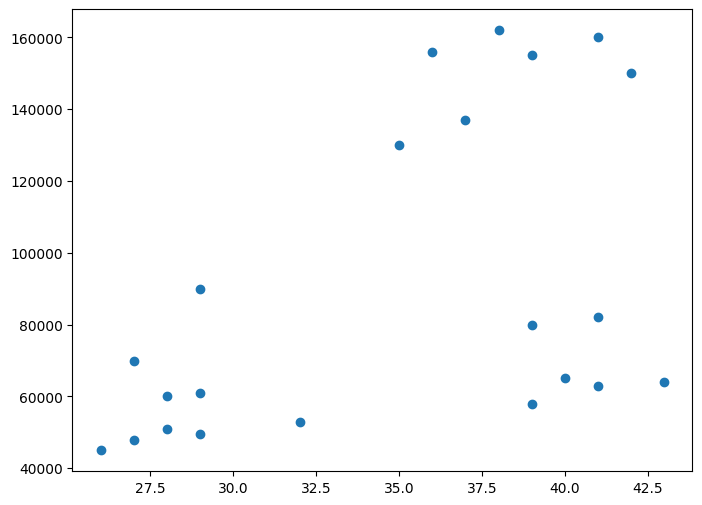

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(file['Age'], file["Income($)"])

In [5]:
# Here from the visual appeal we can see that there can be three clusters
# Hence lets just add and see what can we do there

In [6]:
from sklearn.cluster import KMeans

km1 = KMeans(n_clusters=3)

km1.fit_predict(file[['Age', 'Income($)']])

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [7]:
file['Cluster'] = km1.fit_predict(file[['Age', 'Income($)']])

In [8]:
file.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


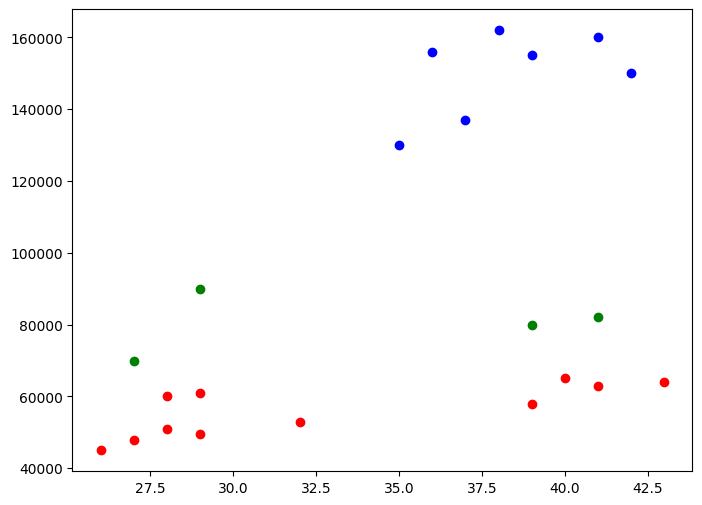

In [9]:
df1 = file[file['Cluster'] == 0]
df2 = file[file['Cluster'] == 1]
df3 = file[file['Cluster'] == 2]

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df1['Age'], df1['Income($)'], color='red')
ax.scatter(df2['Age'], df2['Income($)'], color='blue')
ax.scatter(df3['Age'], df3['Income($)'], color='green')

In [10]:
# here we can see that these are not the clusters that we expected 
# this is because there is no standar scale

In [11]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
file["Age"] = scale.fit_transform(file[["Age"]])
file['Income($)'] = scale.fit_transform(file[['Income($)']])

In [12]:
file

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [13]:
from sklearn.cluster import KMeans

km2 = KMeans(n_clusters=3)
file['Clusters(updated)'] = km2.fit_predict(file[['Age', 'Income($)']])

In [14]:
file

,Name,Age,Income($),Cluster,Clusters(updated)
0,Rob,0.058824,0.213675,2,0
1,Michael,0.176471,0.384615,2,0
2,Mohan,0.176471,0.136752,0,0
3,Ismail,0.117647,0.128205,0,0
4,Kory,0.941176,0.897436,1,1
5,Gautam,0.764706,0.940171,1,1
6,David,0.882353,0.982906,1,1
7,Andrea,0.705882,1.000000,1,1
8,Brad,0.588235,0.948718,1,1
9,Angelina,0.529412,0.726496,1,1


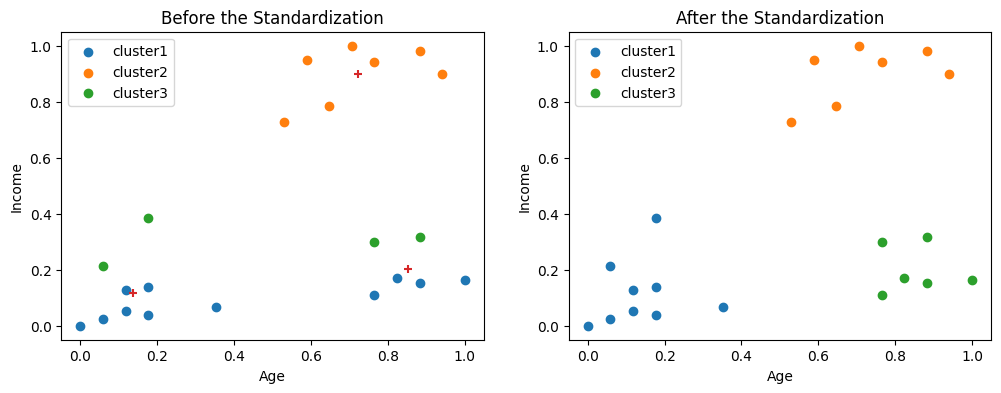

In [15]:
df1_old = file[file['Cluster'] == 0]
df2_old = file[file['Cluster'] == 1]
df3_old = file[file['Cluster'] == 2]

df1_new = file[file['Clusters(updated)'] == 0]
df2_new = file[file['Clusters(updated)'] == 1]
df3_new = file[file['Clusters(updated)'] == 2]


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, 
            figsize=(12, 4))
ax1.scatter(df1_old['Age'], df1_old['Income($)'], label="cluster1")
ax1.scatter(df2_old['Age'], df2_old['Income($)'], label='cluster2')
ax1.scatter(df3_old['Age'], df3_old['Income($)'], label='cluster3')
# ax1.scatter(km1.cluster_centers_[:, 0], km1.cluster_centers_[:, 1], label="centroid", marker='+')
ax1.set(
    title='Before the Standardization', 
    xlabel="Age", 
    ylabel="Income"
)
ax1.legend()

ax2.scatter(df1_new['Age'], df1_new['Income($)'], label='cluster1')
ax2.scatter(df2_new['Age'], df2_new['Income($)'], label='cluster2')
ax2.scatter(df3_new['Age'], df3_new['Income($)'], label='cluster3')
ax1.scatter(km2.cluster_centers_[:, 0], km2.cluster_centers_[:, 1], label="centroid", marker='+')
ax2.set(
    title='After the Standardization', 
    xlabel="Age", 
    ylabel="Income"
)
ax2.legend()

In [16]:
# Now lest just use the elbow method to get the optimal number of cluster

In [27]:
mse1 = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(file[['Age', 'Income($)']])
    mse1.append(km.inertia_)

In [28]:
mse1

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.2818479744366238,
 0.21055478995472496,
 0.16869711728567788,
 0.13265419827245162,
 0.11105093537331143,
 0.08306428295966342]

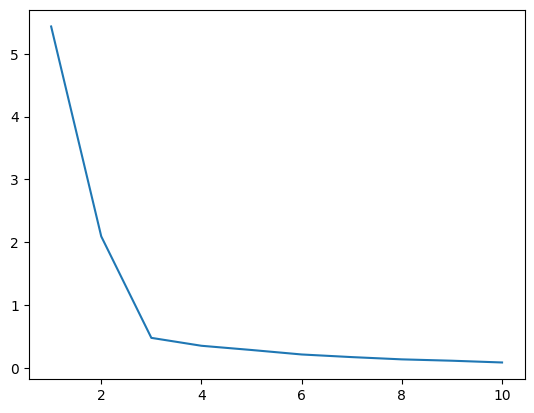

In [29]:
plt.plot(k_range, mse1)